# MERISKILL Project 2

# Title of Project: Pima Indian heritage (Patients diagnosis on Diabetes)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. 

The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. 

In particular, all patients here are females at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

# Import Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import dataset

In [252]:
D_Data = pd.read_csv("diabetes.csv")
print("Data imported successfully.")

Data imported successfully.


# View dataset structure

In [28]:
D_Data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [29]:
D_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
D_Data.shape

(768, 9)

In [39]:
D_Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [84]:
D_Data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
AgeGroup                    0
dtype: int64

# Train the model

In [139]:
# Select Attributes and Target

Attributes = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']
X = D_Data[Attributes]
y = D_Data['Outcome']

In [93]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Train the logistic regression model

Regressor = LogisticRegression()
Regressor.fit(X_train, y_train)

LogisticRegression()

In [122]:
# View the Test feature values

y_pred = Regressor.predict(X_test)
print(X_test)

     Pregnancies  Glucose  BloodPressure  Insulin   BMI  Age
668            6       98             58      190  34.0   43
324            2      112             75        0  35.7   21
624            2      108             64        0  30.8   21
690            8      107             80        0  24.6   34
473            7      136             90        0  29.9   50
..           ...      ...            ...      ...   ...  ...
355            9      165             88        0  30.4   49
534            1       77             56       56  33.3   24
344            8       95             72        0  36.8   57
296            2      146             70      360  28.0   29
462            8       74             70       49  35.3   39

[154 rows x 6 columns]


# Making Prediction

Now the Model has been trained, time to make prediction  on a new patient

In [170]:
# PREDICTION ON A NEW PATIENT

New_patient_attributes = [[6, 70, 34, 90,100.1, 65]]
Pred = Regressor.predict(New_patient_attributes)
print('Prediction for new patient:', Pred)


Prediction for new patient: [1]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The above shows patients with the above records based on the attributes is likely to have diabetes.

# Comparing Actual Outcome and Predicted Outcome

In [173]:
Data = pd.DataFrame({'Actual Outcome': y_test, 'Predicted Outcome': y_pred})  
Data 

,Actual Outcome,Predicted Outcome
668,0,0
324,0,0
624,0,0
690,0,0
473,0,1
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


# Evaluate the model

Now to evaluating the model to access its performance, accuracy and effectiveness on predictions

In [126]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7207792207792207
Confusion Matrix:
 [[77 22]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



Accuracy: 
The model got about 72% of the predictions correct, meaning it was right about 72% of the time.

Confusion Matrix:

True Negatives (TN): The Model predicted 77 cases correctly as negative (0) out of a total of 99 actual negatives.

False Positives (FP): Predicted 22 cases as positive (1), but they were actually negative (0).

False Negatives (FN): Predicted 21 cases as negative (0), but they were actually positive (1).

True Positives (TP): Predicted 34 cases correctly as positive (1) out of a total of 55 actual positives.


Classification Report:
Precision: For predicting the negative class (0), the model was about 79% accurate. For predicting the positive class (1), it was about 61% accurate.

Recall: For the negative class (0), the model identified about 78% of the actual negatives. For the positive class (1), it identified about 62% of the actual positives.
F1-score: The F1-score is a balance between precision and recall. For the negative class (0), it's about 78%. For the positive class (1), it's about 61%.

Support:
This shows how many samples are available for each Outcome in the testing set

Negative(0): has 99 occurences in the testing test

Positive(1): has 55 occurences in the testing testing

# Distribution of occurrence of each outcome 

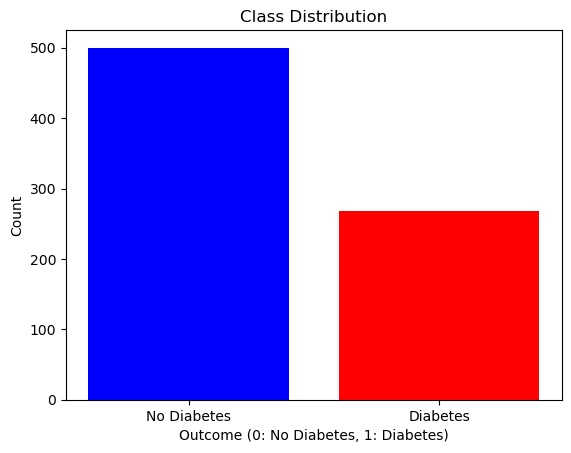

In [140]:
# Count the number of occurrences of each class (0=no diabetes, 1=diabetes)
class_distribution = D_Data['Outcome'].value_counts()

# Plotting the class distribution using a bar plot
plt.bar(class_distribution.index, class_distribution.values, color=['Blue', 'Red'])
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_distribution.index, ['No Diabetes', 'Diabetes'])
plt.show()

Insights: 

The above bar charts reveals that the number of patients without diabetes are two times higher than the number of individusals with diabetes

In [ ]:
# Count the number of occurrences of each class (0=no diabetes, 1=diabetes)
class_distribution = D_Data['Outcome'].value_counts()

# Plotting the class distribution using a bar plot
plt.bar(class_distribution.index, class_distribution.values, color=['Blue', 'Red'])
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_distribution.index, ['No Diabetes', 'Diabetes'])
plt.show()

# The Correlation Matrix

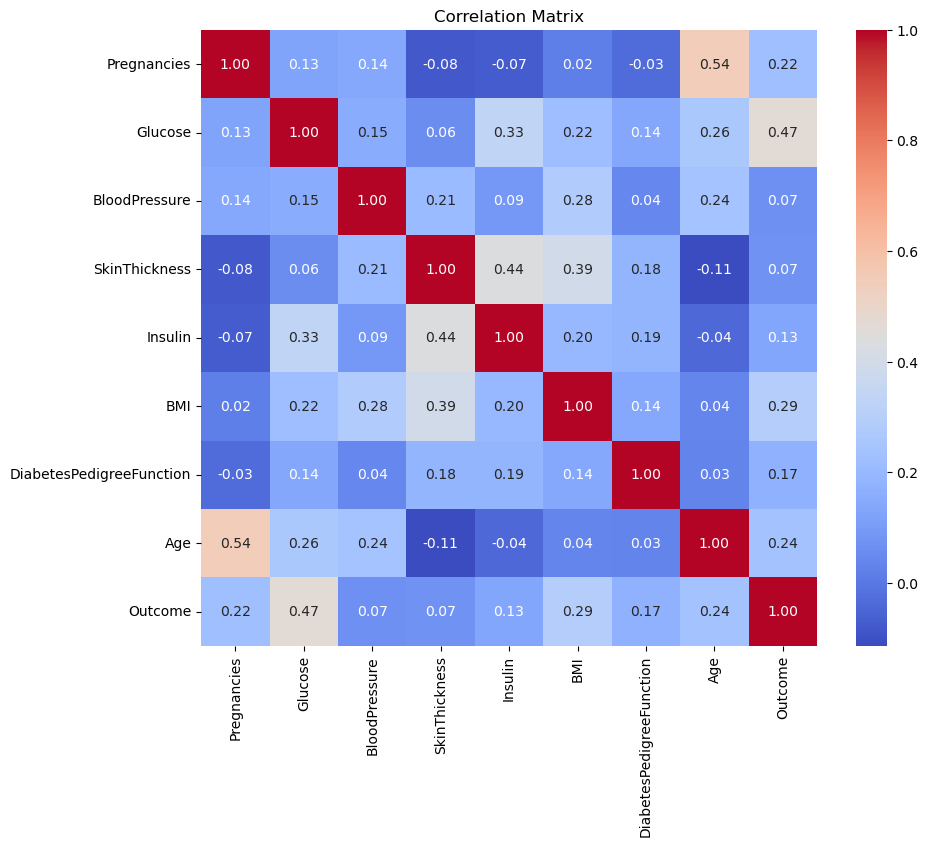

In [57]:
correlation_matrix = D_Data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

INSIGHT: 

With the red diagonal, each variable is perfectly correlated with itself. In essence, it indicates a perfect positive linear relationship. as the value of one variable increases, the value of other variables increcases. 

A higher correlation between a specific variable (e.g., glucose levels, BMI, etc.) and diabetes in the correlation matrix suggests a stronger relationship between that variable and the likelihood of a patient having diabetes

# Proportion of Diabetes by Age group

In [78]:
# Define age groups
age_lists = [0, 20, 30, 40, 50, 60, 70, 80, 90]
age_range = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Create a new column 'AgeGroup' based on age no
D_Data['AgeGroup'] = pd.cut(D_Data['Age'], bins=age_lists, labels=age_range, right=False)

print("New column created successfully")

New column created successfully


In [79]:
#View new column "AgeGroup"
D_Data.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,51-60
1,1,85,66,29,0,26.6,0.351,31,0,31-40
2,8,183,64,0,0,23.3,0.672,32,1,31-40
3,1,89,66,23,94,28.1,0.167,21,0,21-30


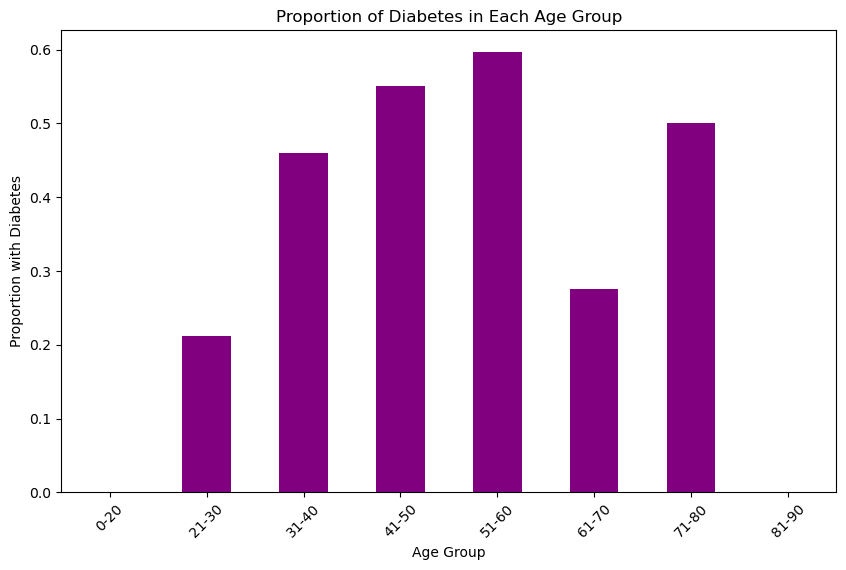

In [145]:
Age_group_proportions = D_Data.groupby('AgeGroup')['Outcome'].mean()

# Plotting the proportion of diabetes in each age group
plt.figure(figsize=(10, 6))
age_group_proportions.plot(kind='bar', color='Purple')
plt.xlabel('Age Group')
plt.ylabel('Proportion with Diabetes')
plt.title('Proportion of Diabetes in Each Age Group')
plt.xticks(rotation=45)
plt.show()

INSIGHTS: 

The above shows that the propportion of individuals with the highest diabetes rate are people within the age range of 51-60, the x-axis shows the agegroup while the y-axis shows the proportion of individuals with diabetes. 

It is apparent that the tendency to be diabetic increases with age.

# Distribution of the attributes for patients 0 & 1 outcome.

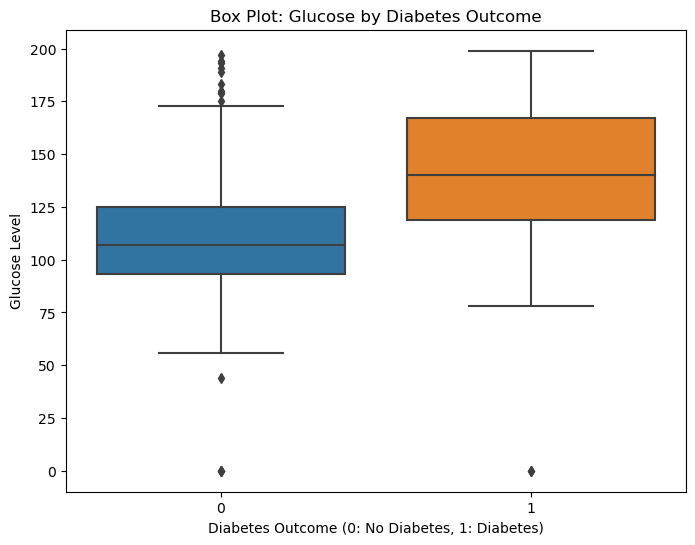

In [172]:
# Plotting histograms for numerical features, separated by the target variable
# Glucose by Outcome

plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=D_Data)
plt.title('Box Plot: Glucose by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Glucose Level')
plt.show()

INSIGHTS:

The box plot illustrates the distribution of glucose levels for two groups based on the diabetes outcome:
No Diabetes (Outcome = 0): The box plot shows the median (line inside the box), quartiles (box), and any outliers (points outside the whiskers) for individuals without diabetes.
Diabetes (Outcome = 1): Similarly, it displays the same summary statistics for individuals with diabetes.
Explanation:

We can observe that the median glucose level for individuals with diabetes (Outcome = 1) appears to be higher than for those without diabetes (Outcome = 0).
The box for diabetes (Outcome = 1) is generally higher and wider, indicating a broader range of glucose levels for individuals with diabetes compared to those without.

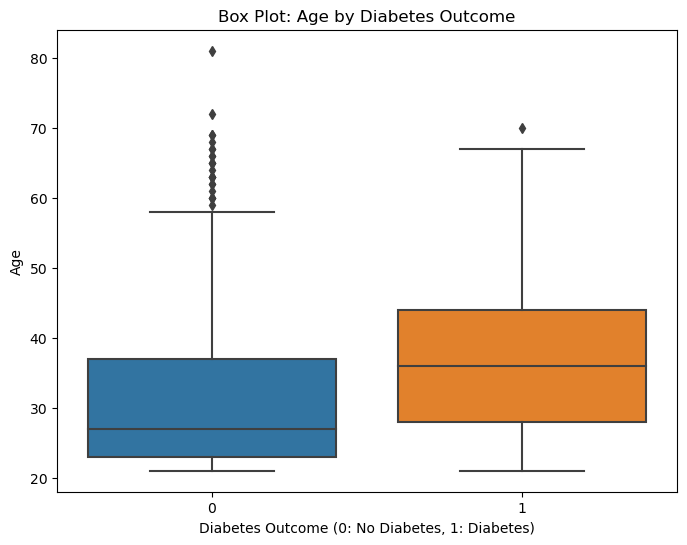

In [149]:
# AGE BY OUTCOME

plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=D_Data)
plt.title('Box Plot: Age by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Age')
plt.show()

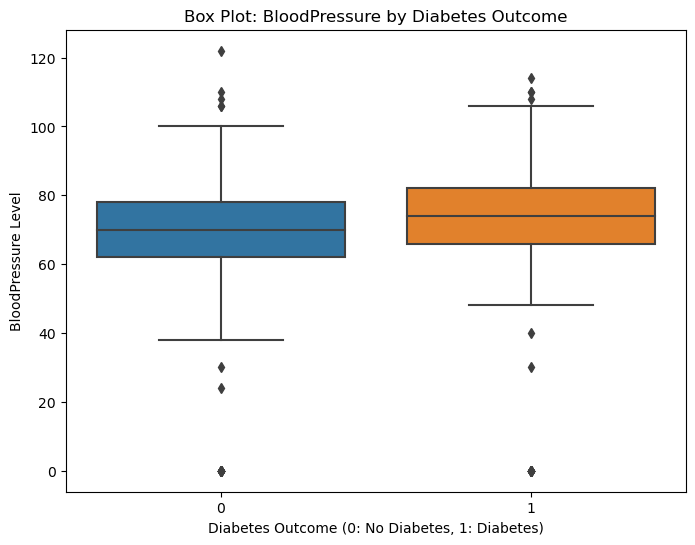

In [160]:
# BLOODPRESSURE LEVEL BY OUTCOME

plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=D_Data)
plt.title('Box Plot: BloodPressure by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('BloodPressure Level')
plt.show()

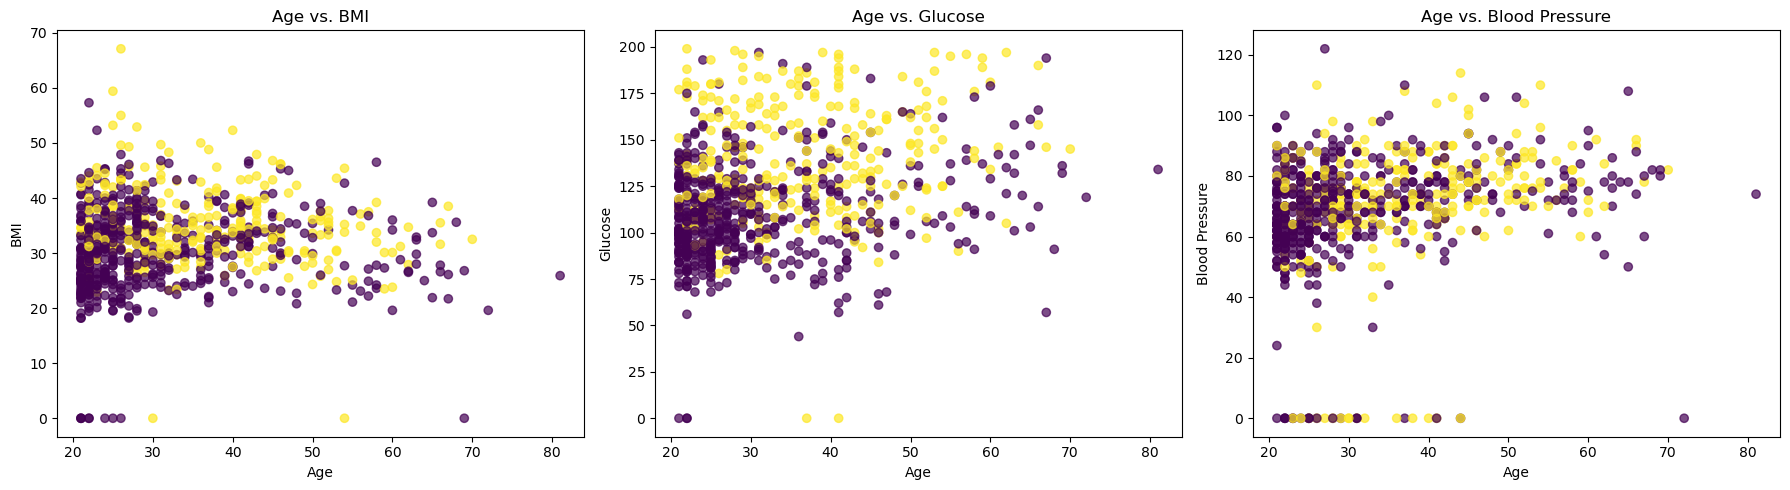

In [136]:
# Scatter plots of Age against BMI, Glucose, and BloodPressure

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(D_Data['Age'], D_Data['BMI'], c=D_Data['Outcome'], cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs. BMI')

plt.subplot(1, 3, 2)
plt.scatter(D_Data['Age'], D_Data['Glucose'], c=D_Data['Outcome'], cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Age vs. Glucose')

plt.subplot(1, 3, 3)
plt.scatter(D_Data['Age'], D_Data['BloodPressure'], c=D_Data['Outcome'], cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs. Blood Pressure')

plt.tight_layout()
plt.show()

INSIGHTS: 

while 'Age' appears to have a visible relationship with 'BMI' (indicating a tendency for higher BMI with age). 

It does not show a strong linear relationship with 'Glucose' or 'Blood Pressure'. This suggests that factors beyond age play a substantial role in determining glucose levels and blood pressure. Understanding these relationships is crucial for assessing health-related patterns and implications in the context of diabetes.

# Feature Importance

In making prediction, the model rely most on the Glucose level of patients. Thus, "Glucose" is a more influential or significant predictor when it comes to predicting diabetes of patients.


In [253]:
# Drop the Outcome column
D_Data.drop('Outcome', axis=1, inplace=True)

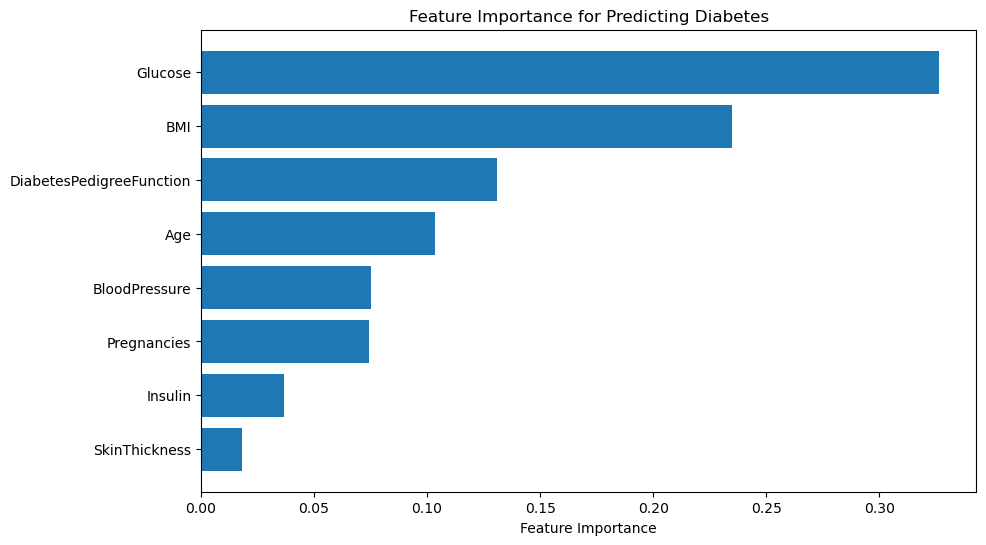

In [257]:
features = D_Data  # Replace with your actual dataset

# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(features, target)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
df_feature_importance = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
df_feature_importance = df_feature_importance.sort_values(by='importance', ascending=True)

# Bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(df_feature_importance)), df_feature_importance['importance'], align='center')
plt.yticks(range(len(df_feature_importance)), df_feature_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Predicting Diabetes')
plt.show()



                                   I appreciate you going through my work. 👍🙏